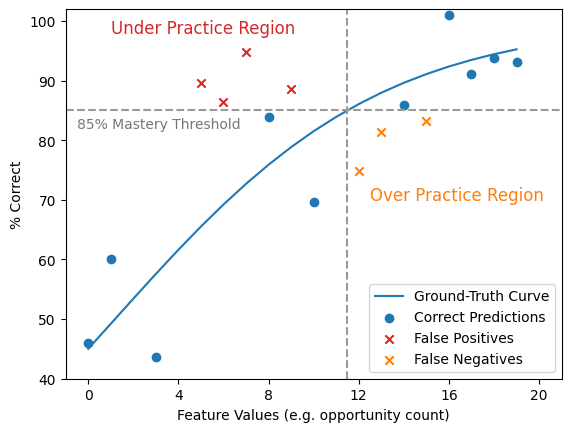

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logit, expit
sigmoid = expit

# To get default pallete, which is a sort of darkish/high-saturation pastel 
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']



curve = 100*sigmoid(np.linspace(-.2, 3.0, 20))
plt.plot(np.arange(20), curve, label="Ground-Truth Curve")

# Mastery line and intersection
plt.axhline(85,linestyle='--', color='#999')
plt.axvline(np.argmin(np.abs(curve-85))-.5,linestyle='--', color='#999')

# Make random points for predictions
np.random.seed(8)
pred_pts = curve+np.random.normal(0,10.0,len(curve))
xs = np.arange(20)

# Find points in okay and under/over regions
Pm = (curve >= 85)
pPm = (pred_pts >= 85)
Nm = (curve < 85)
pNm =  (pred_pts < 85)
okay_mask = (Pm & pPm) | (Nm & pNm)
under_mask = Nm & pPm
over_mask = Pm & pNm

plt.scatter(xs[okay_mask], pred_pts[okay_mask], label="Correct Predictions")
plt.scatter(xs[under_mask], rand_pts[under_mask], label="False Positives",marker='x', color='#d62728')
plt.scatter(xs[over_mask], rand_pts[over_mask], label="False Negatives",marker='x', color='#ff7f0e')

plt.ylabel("% Correct")
plt.xlabel("Feature Values (e.g. opportunity count)")
plt.ylim(40, 102)
plt.xlim(-1, 21)
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 21, 4.0))
#plt.tick_params(labelbottom=False)
#plt.text(-.5,83, "85% Mastery Threshold")
plt.text(1,98, "Under Practice Region", fontsize=12, color='#d62728')
plt.text(12.5,70, "Over Practice Region", fontsize=12, color='#ff7f0e')
plt.text(-.5,82, "85% Mastery Threshold", color='#777')
plt.show()

